In [3]:
import cv2
from matplotlib import pyplot as plt
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
import os

### Used for creating training and test data

In [6]:
label = '1_finger'
ct = max([int(i.split('.')[0]) for i in next(os.walk(label))[2]])+1

In [12]:
cam = cv2.VideoCapture(0)
label = '2_finger'
try:
    ct = max([int(i.split('.')[0]) for i in next(os.walk(label))[2]])+1
except Exception:
    ct = 1
while True:
    
    _, img = cam.read()
    bounds = (0, 0, 300, 300)
    cv2.rectangle(img, bounds, (255, 255, 255), 1)
    
    cv2.imshow('camera', img)
    cv2.imshow('frame', img[bounds[1]:bounds[1]+bounds[3], bounds[0]:bounds[0]+bounds[2]])
    
    key = cv2.waitKey(1) & 0xff
    
    if key == ord('s'):
        cropped = img[bounds[1]:bounds[1]+bounds[3], bounds[0]:bounds[0]+bounds[2]].copy()
        cv2.imwrite('{}\\{}.jpg'.format(label, ct), cropped)
        cropped2 = cv2.flip(cropped, 1)
        ct+=1
        cv2.imshow('capture', cropped)
    
    if key == ord('q'):
        break
    
cam.release()
cv2.destroyAllWindows()

## TRAINING

In [3]:
import tensorflow as tf
import os
import numpy as np

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [5]:
X = []
Y = []
labels = ['palm', 'fist']
for i in range(len(labels)):
    for j in next(os.walk(labels[i]))[2]:
        if '.jpg' in j:
            X.append(rgb2gray(img_to_array(load_img('{}\\{}'.format(labels[i], j), target_size=(75, 75)))))
            Y.append(i)


In [6]:
Z = []

# SHIT CODE
for i in range(len(X)):
    Z.append([])
    for j in range(len(X[i])):
        Z[i].append([])
        for k in range(len(X[i][j])):
            Z[i][j].append([])
            Z[i][j][k].append(X[i][j][k])

X = np.asarray(X)
Y = np.asarray(Y)
Z = np.asarray(Z)

In [7]:
print(X.shape)
print(Y.shape)
print(Z.shape)

(148, 75, 75)
(148,)
(148, 75, 75, 1)


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = Z.copy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (4,4), activation='relu', input_shape=(75, 75, 1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(8, (2,2), activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(2),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 72, 72, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Train on 118 samples, validate on 30 samples
Epoch 1/20
118/118 [==============================] - 6s 49ms/sample - loss: 2.1600 - accuracy: 0.5085 - val_loss: 0.4905 - val_accuracy: 0.8333
Epoch 2/20
118/118 [==============================] - 0s 504us/sample - loss: 0.5197 - accuracy: 0.8136 - val_loss: 0.7139 - val_accuracy: 0.7000
Epoch 3/20
118/118 [==============================] - 0s 473us/sample - loss: 0.3290 - accuracy: 0.9237 - val_loss: 0.3224 - val_accuracy: 0.9000
Epoch 4/20
118/118 [==============================] - 0s 499us/sample - loss: 0.3226 - accuracy: 0.8644 - val_loss: 0.2566 - val_accuracy: 0.9333
Epoch 5/20
118/118 [==============================] - 0s 490us/sample - loss: 0.2885 - accuracy: 0.8814 - val_loss: 0.3374 - val_accuracy: 0.8000
Epoch 6/20
118/118 [==============================] - 0s 499us/sample - loss: 0.2009 - accuracy: 0.9068 - val_loss: 0.1893 - val_accuracy: 0.9667
Epoch 7/20
118/118 [==============================] - 0s 516us/sample - loss: 0.

In [15]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

30/1 - 0s - loss: 0.0853 - accuracy: 0.9667

Test accuracy: 0.96666664


## RUNNING

In [23]:
cam = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX 
ct = 0
while True:
    
    _, img = cam.read()
    bounds = [100, 150, 150, 175]
    cv2.rectangle(img, bounds, (255, 255, 255), 1)
    
    
    cropped = img[bounds[1]:bounds[1]+bounds[3], bounds[0]:bounds[0]+bounds[2]].copy()
    gray = cv2.resize(cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY), (75,75))
    #predictions = model.predict(np.asarray([gray]))
    #cv2.putText(img, labels[np.argmax(predictions)], (50,50), font, 1, (0,0,255), 1, cv2.LINE_AA) 
    lol = []
    for i in range(len(gray)):
        lol.append([])
        for j in range(len(gray[i])):
            lol[i].append([])
            lol[i][j].append(gray[i][j]/255)
    lol = np.asarray(lol)
    predictions = model.predict(np.asarray([lol]))
    cv2.putText(img, labels[np.argmax(predictions)], (50,50), font, 1, (0,0,255), 1, cv2.LINE_AA) 

    
   
    key = cv2.waitKey(1) & 0xff
    
    cv2.imshow('camera', img)
    cv2.imshow('frame', img[bounds[1]:bounds[1]+bounds[3], bounds[0]:bounds[0]+bounds[2]])
   
    if key == ord('j'):
        k1 = img.copy()
    
    if key == ord('k'):
        k2 = img.copy()
    
    if key == ord('q'):
        break
    
cam.release()
cv2.destroyAllWindows()

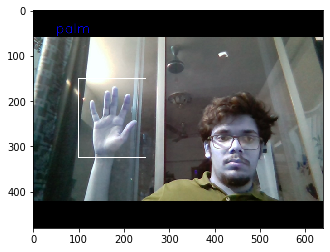

In [31]:
plt.imshow(k1)

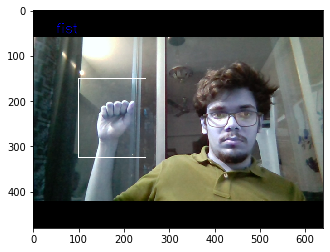

In [32]:
plt.imshow(k2)